**Continued from Part1 Longitudinal Study**

In this notebook, we examine the **lifespan** of authors with regard to their posting behavior in either subreddit.

Specifically, we count
* the number of **days** elapsed between the first post and the last post
* the number of **posts** starting from the first post and ending at the last post

 1\. First define a helper function that computes the number of days elapsed between the first and last post

In [1]:
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def lifespan(df):
    """
    Reduce a dataframe containing the posts of the same author 
    to a number (i.e. # days between the first and last post) 
    """ 
    ma, mi = df["created_utc"].max(), df["created_utc"].min()

    return (ma - mi).days + 1

def split(x):
    tup = x[1:-1].split(", ")
    return float(tup[0])

**MensRights**

In [2]:
df_men = pickle.load(open("MensRights.pickle"))
dist = df_men.groupby("author").apply(lifespan)
dist = np.log10(dist)
dist[:5]

author
---                     2.716003
------___--___------    0.000000
----x----               0.000000
---___________---       0.000000
---sniff---             0.000000
dtype: float64

In [3]:
factor = pd.cut(dist, np.linspace(0, 4., 21), include_lowest=True)
hist_men = dist.groupby(factor).count()
hist_men.index = hist_men.index.map(lambda tup: float(tup[1:-1].split(", ")[0]))

hist_men

0.0    64129
0.2     2180
0.4     1025
0.6     1608
0.8     1433
1.0     1374
1.2     2206
1.4     2231
1.6     3080
1.8     3604
2.0     4236
2.2     5202
2.4     5630
2.6     5845
2.8     5600
3.0     4213
3.2     1399
3.4       79
3.6        0
3.8        0
dtype: int64

In [4]:
df_fem = pickle.load(open("Feminism.pickle"))
dist = df_fem.groupby("author").apply(lifespan)
dist = np.log10(dist)

dist[:5]

author
---              0.000000
---annon---      2.886491
--Dia--          0.903090
--rubberdicks    0.000000
--v00d00--       0.000000
dtype: float64

In [5]:
factor = pd.cut(dist, np.linspace(0, 4., 21), include_lowest=True)
hist_fem = dist.groupby(factor).count()
hist_fem.index = hist_fem.index.map(lambda tup: float(tup[1:-1].split(", ")[0]))
hist_fem

0.0    19334
0.2      777
0.4      351
0.6      570
0.8      456
1.0      410
1.2      613
1.4      667
1.6      847
1.8     1020
2.0     1164
2.2     1276
2.4     1408
2.6     1302
2.8     1014
3.0      522
3.2       41
3.4        0
3.6        0
3.8        0
dtype: int64

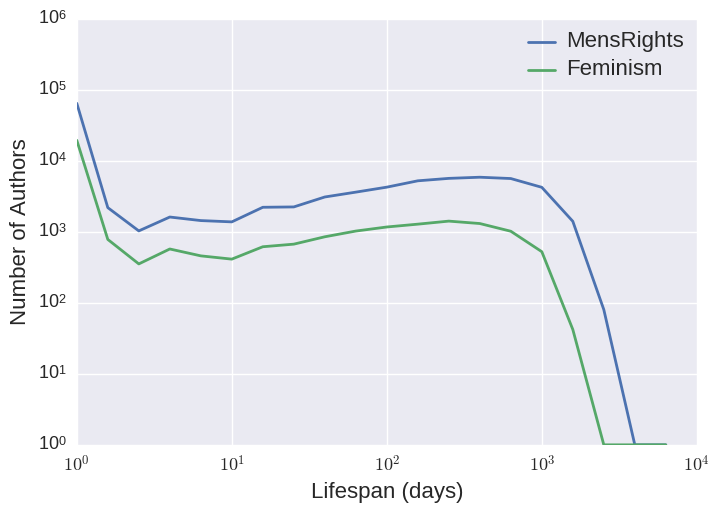

In [6]:
hist = pd.concat([hist_men, hist_fem], axis=1)
hist.columns = ["MensRights", "Feminism"]
hist = hist + 1

hist.plot(xticks=[0, 5, 10, 15, 20], linewidth=2.0)
ax = plt.gca()
ax.set_xticklabels(["$10^{%d}$" % i for i in range(0, 5)])
plt.xlabel("Lifespan (days)", fontsize=16)
plt.ylabel("Number of Authors", fontsize=16)
ax.tick_params(labelsize=13)

plt.setp(ax.get_legend().get_texts(), fontsize='16')
plt.ylim([1, 10e5])
plt.semilogy()
plt.show()

2\. Then, we run the same process but counting the number of **posts** starting from the first post and ending at the last post:

In [7]:
df_men = pickle.load(open("MensRights.pickle"))
dist = df_men["subreddit"].groupby(df_men["author"]).count()
dist = np.log10(dist)
dist[:5]

author
---                     1.886491
------___--___------    0.477121
----x----               0.000000
---___________---       0.000000
---sniff---             0.000000
Name: subreddit, dtype: float64

In [8]:
factor = pd.cut(dist, np.linspace(0, 5., 21), include_lowest=True)
hist_men = dist.groupby(factor).count()
hist_men.index = hist_men.index.map(lambda tup: float(tup[1:-1].split(", ")[0]))
hist_men

0.00    46900
0.25    26073
0.50    10392
0.75    11123
1.00     6315
1.25     5117
1.50     3345
1.75     2313
2.00     1438
2.25      900
2.50      513
2.75      297
3.00      185
3.25       89
3.50       49
3.75       19
4.00        6
4.25        0
4.50        0
4.75        0
Name: subreddit, dtype: int64

In [9]:
df_fem = pickle.load(open("Feminism.pickle"))
dist = df_fem["subreddit"].groupby(df_fem["author"]).count()
dist = np.log10(dist)
dist[:5]

author
---              0.000000
---annon---      1.113943
--Dia--          0.301030
--rubberdicks    0.301030
--v00d00--       0.000000
Name: subreddit, dtype: float64

In [10]:
factor = pd.cut(dist, np.linspace(0, 5., 21), include_lowest=True)
hist_fem = dist.groupby(factor).count()
hist_fem.index = hist_fem.index.map(lambda tup: float(tup[1:-1].split(", ")[0]))
hist_fem[:5]

0.00    14136
0.25     8068
0.50     3046
0.75     3068
1.00     1422
Name: subreddit, dtype: int64

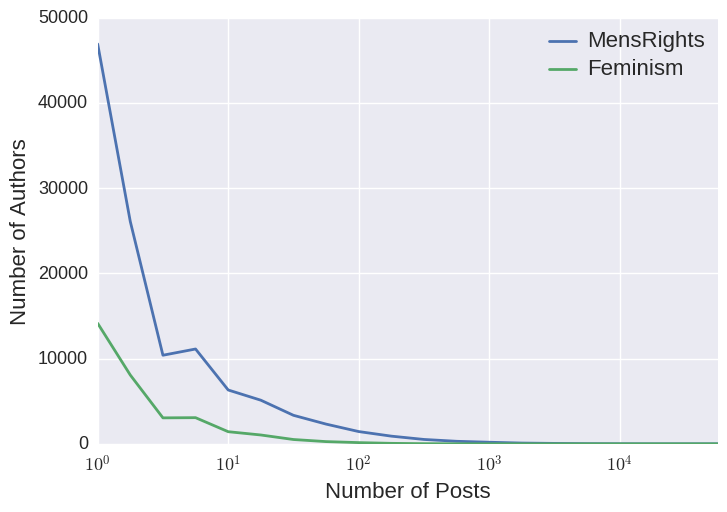

In [11]:
hist = pd.concat([hist_men, hist_fem], axis=1)
hist.columns = ["MensRights", "Feminism"]

hist.plot(xticks=[0, 4, 8, 12, 16], linewidth=2.0)
ax = plt.gca()
ax.set_xticklabels(["$10^{%d}$" % i for i in range(0, 5)])
plt.xlabel("Number of Posts", fontsize=16)
plt.ylabel("Number of Authors", fontsize=16)
ax.tick_params(labelsize=13)

plt.setp(ax.get_legend().get_texts(), fontsize='16')
plt.show()

As we see in the above distributions, the user activity is highly skewed, just like many datasets from social media: the majority of users make only a single post in their subreddit lifespan.

Something that may have caught your attention: there is a **bump** in the tailed distribution for the first figure.

There means that in addition to the group of users who post once and never come back, there appears to a second group of users activity spans much longer time.